## Objectives

Performing exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [3]:
## Exploratory Data Analysis


In [4]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


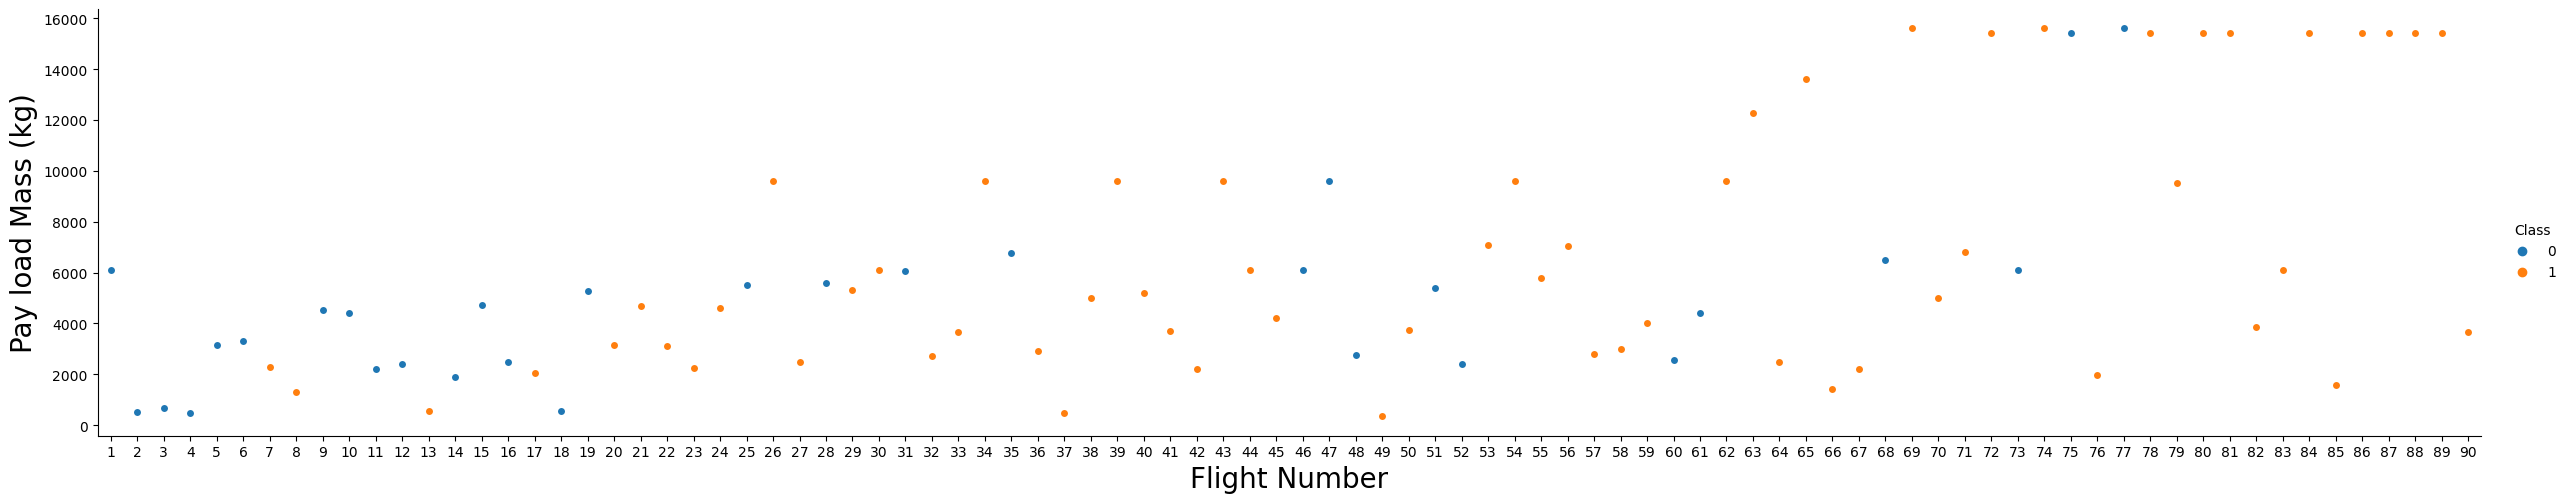

In [5]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  CCAFS LC-40, has a success rate of 60 %, while  KSC LC-39A and VAFB SLC 4E has a success rate of 77%.


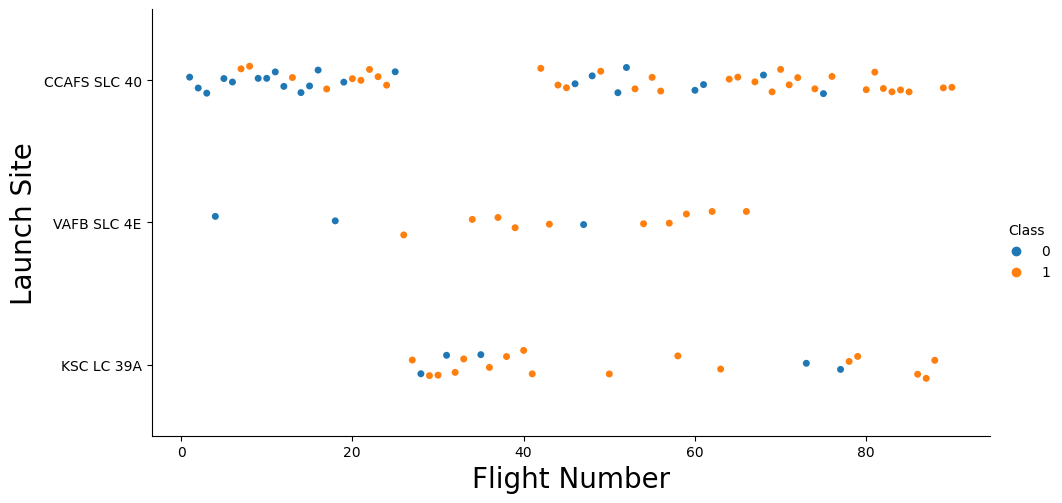

In [6]:
#Visualize the relationship between Flight Number and Launch Site
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 2)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

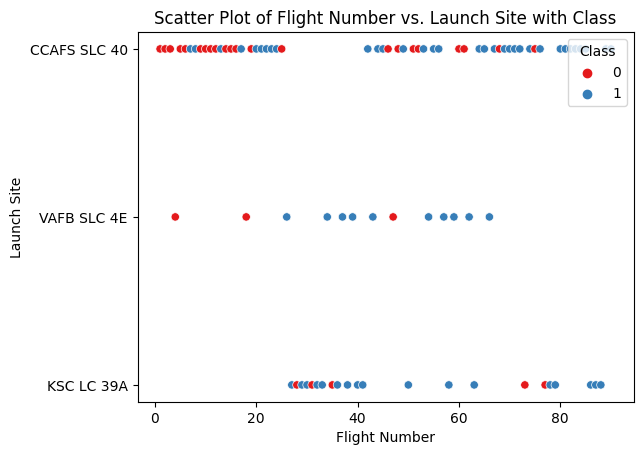

In [7]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.scatterplot( y='LaunchSite', x='FlightNumber',  data=df, hue='Class', palette='Set1')
plt.title('Scatter Plot of Flight Number vs. Launch Site with Class')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.legend(title='Class', loc='upper right')
plt.show()

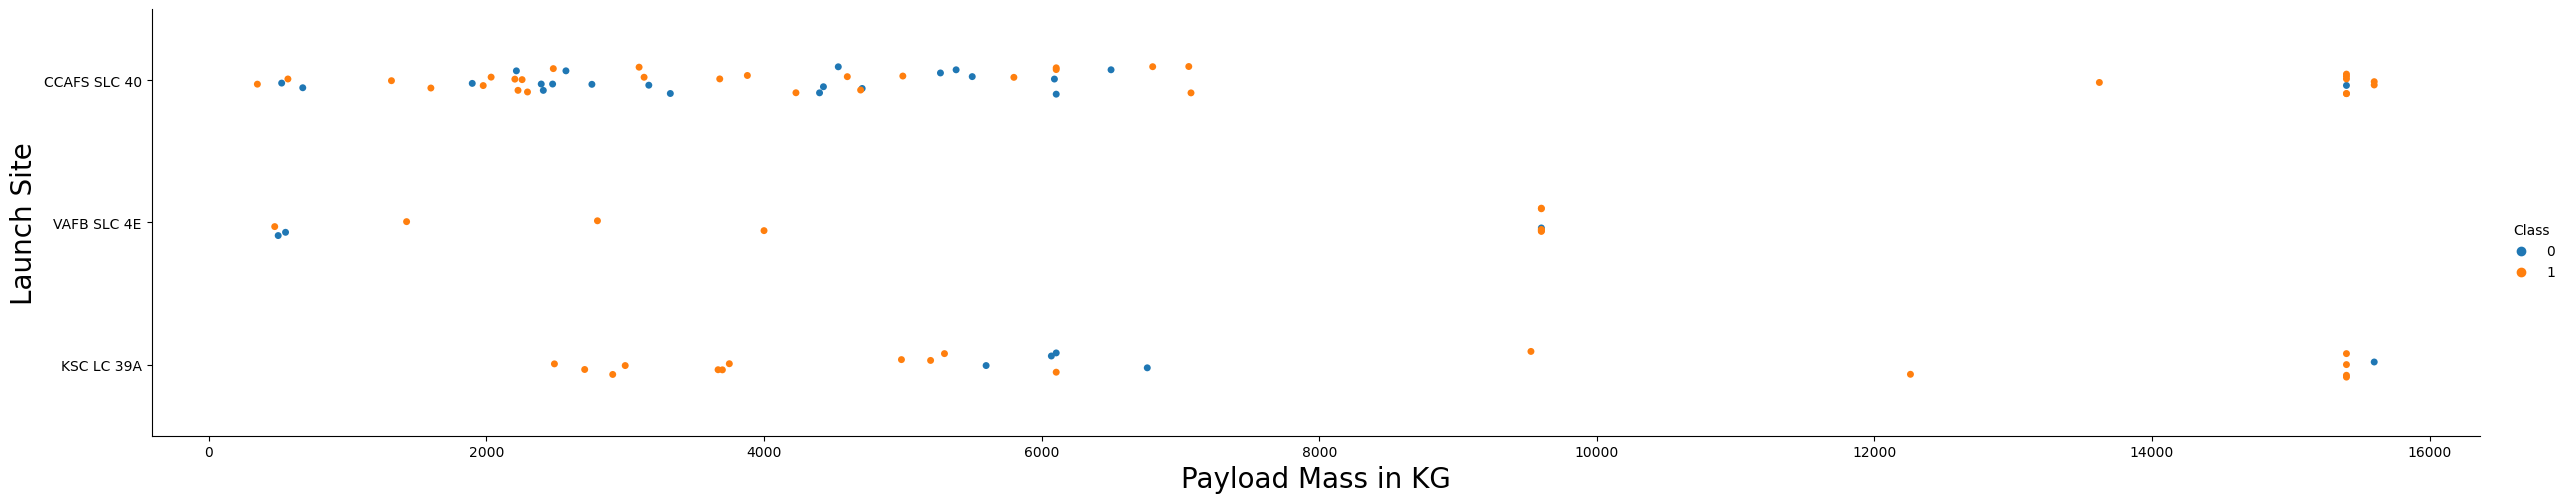

In [8]:
#Visualize the relationship between Payload and Launch Site
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Payload Mass in KG",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

We also want to observe if there is any relationship between launch sites and their payload mass.


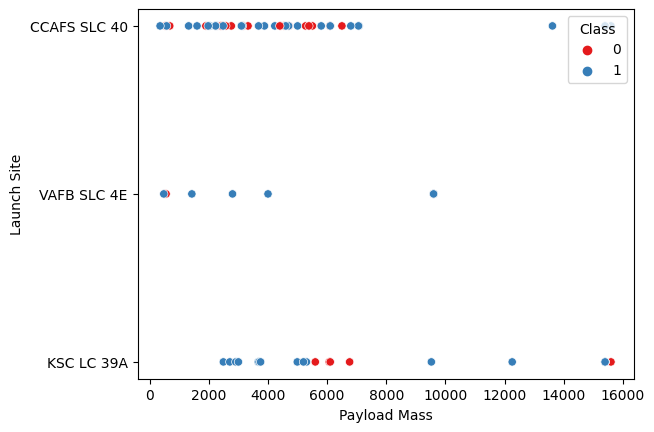

In [9]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.scatterplot( y='LaunchSite', x='PayloadMass',  data=df, hue='Class', palette='Set1')
plt.xlabel('Payload Mass')
plt.ylabel('Launch Site')
plt.legend(title='Class', loc='upper right')
plt.show()

Now if we observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


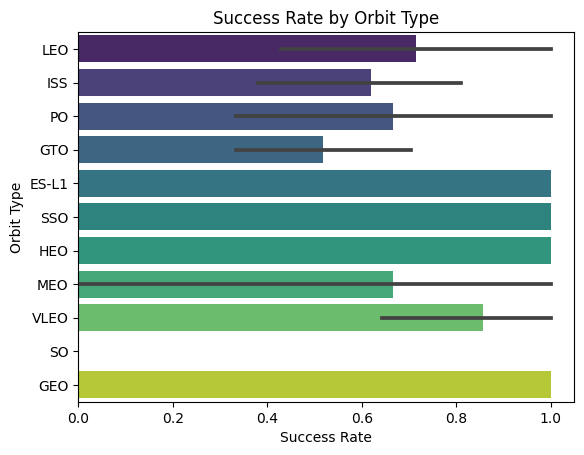

In [10]:
# Visualize the relationship between success rate of each orbit type
sns.barplot(data=df, x='Class', y='Orbit', palette='viridis')
# Customize the plot
plt.title('Success Rate by Orbit Type')
plt.xlabel('Success Rate')
plt.ylabel('Orbit Type')
plt.show()

Next, we want to visually check if there are any relationship between success rate and orbit type.


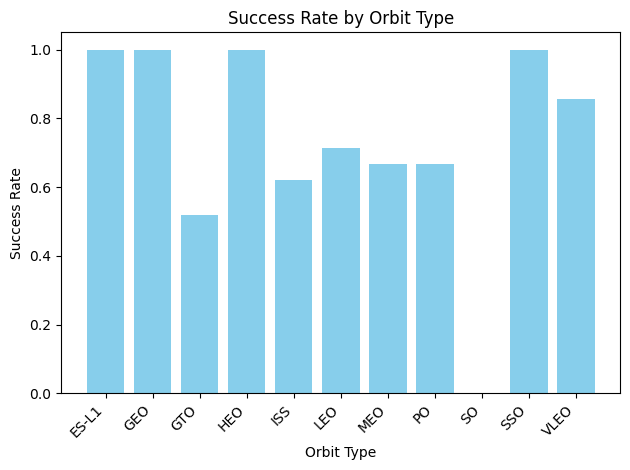

In [11]:
# HINT use groupby method on Orbit column and get the mean of Class column

# Calculate the success rate for each orbit type
df1 = df.groupby('Orbit')['Class'].mean().reset_index()

plt.bar(df1['Orbit'], df1['Class'], color='skyblue')

# Customize the plot
plt.title('Success Rate by Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

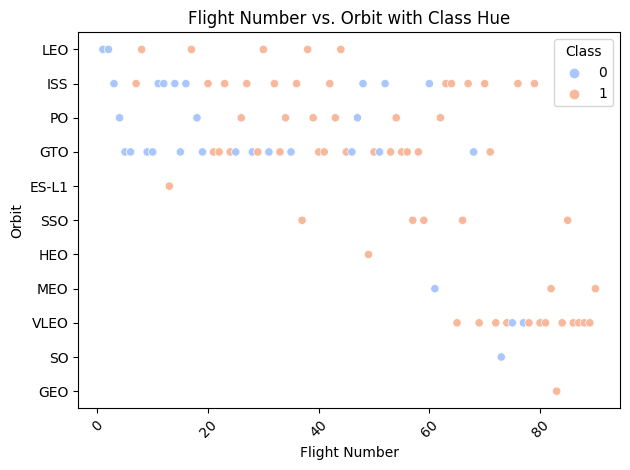

In [12]:
#Visualize the relationship between FlightNumber and Orbit type
sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Class', palette='coolwarm')

# Customize the plot
plt.title('Flight Number vs. Orbit with Class Hue')
plt.xlabel('Flight Number')
plt.ylabel('Orbit')
plt.legend(title='Class', loc='upper right')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


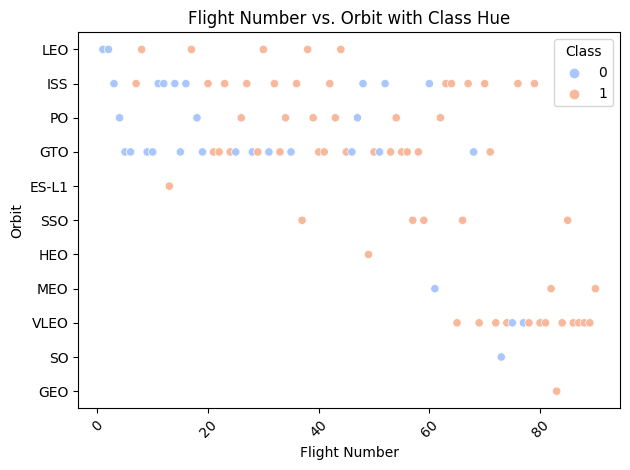

In [13]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Class', palette='coolwarm')

# Customize the plot
plt.title('Flight Number vs. Orbit with Class Hue')
plt.xlabel('Flight Number')
plt.ylabel('Orbit')
plt.legend(title='Class', loc='upper right')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


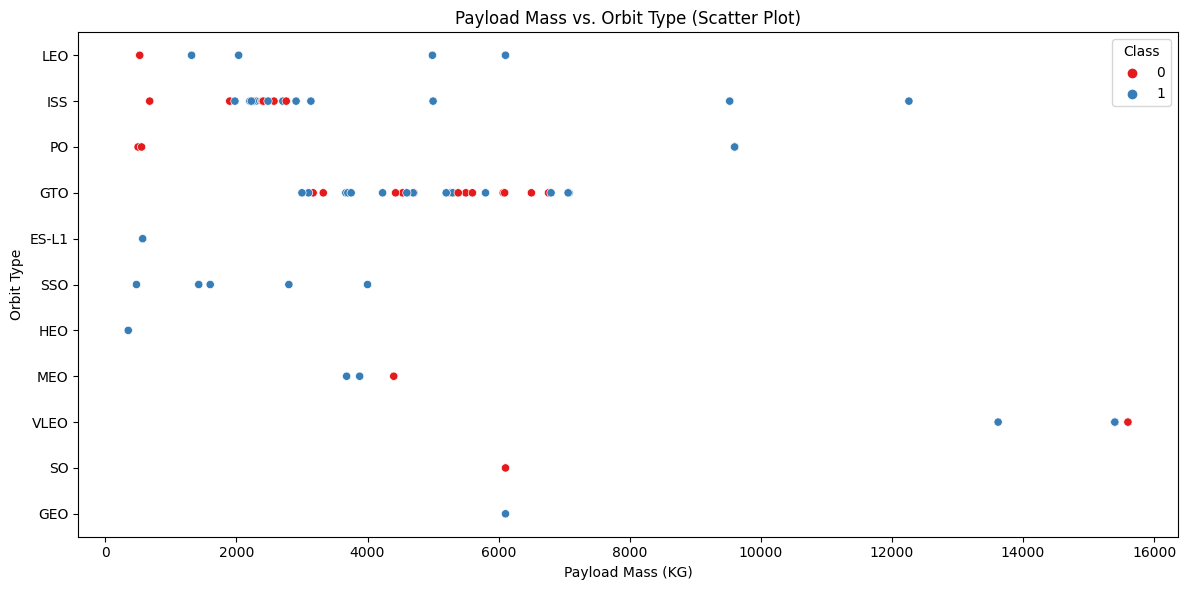

In [14]:
### TASK  5: Visualize the relationship between Payload and Orbit type
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue="Class",palette='Set1')

# Customize the plot
plt.title('Payload Mass vs. Orbit Type (Scatter Plot)')
plt.xlabel('Payload Mass (KG)')
plt.ylabel('Orbit Type')

# Show the plot
plt.tight_layout()
plt.show()

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


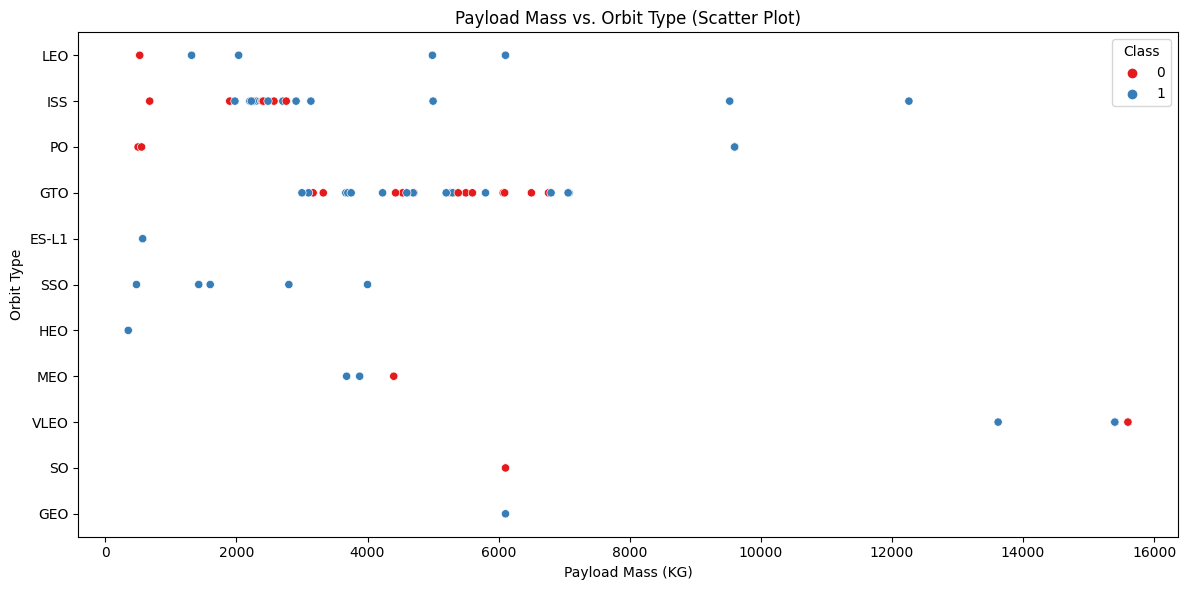

In [15]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue="Class", palette='Set1')

# Customize the plot
plt.title('Payload Mass vs. Orbit Type (Scatter Plot)')
plt.xlabel('Payload Mass (KG)')
plt.ylabel('Orbit Type')

# Show the plot
plt.tight_layout()
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


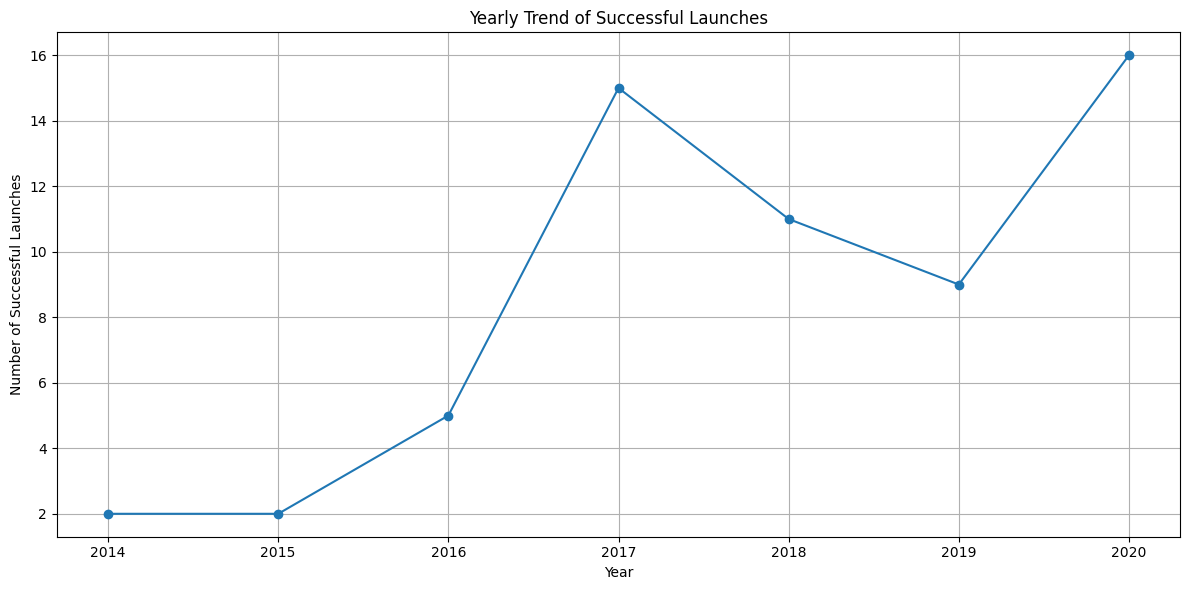

In [16]:
### TASK  6: Visualize the launch success yearly trend


# Assuming you have a DataFrame named df with columns 'Date' and 'Mission_Outcome'
# Replace 'Date' and 'Mission_Outcome' with your actual column names

# Convert the 'Date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the 'Date' column and create a new column 'Year'
df['Year'] = df['Date'].dt.year

# Filter the DataFrame for successful missions (assuming 'Success' in 'Mission_Outcome' indicates success)
successful_missions = df[df['Class']  ==1]

# Group by 'Year' and count the number of successful launches per year
success_counts = successful_missions.groupby('Year').size()

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(success_counts.index, success_counts.values, marker='o', linestyle='-')

# Customize the plot
plt.title('Yearly Trend of Successful Launches')
plt.xlabel('Year')
plt.ylabel('Number of Successful Launches')

# Show the plot
plt.grid()
plt.tight_layout()
plt.show()


The function will help you get the year from the date:


In [18]:
def extract_years_from_date_column(dataframe, date_column_name, new_column_name='Year'):
    """
    Extracts years from a specified date column in a Pandas DataFrame with 'YYYY-MM-DD' format
    and creates a new column with the years.

    Args:
        dataframe (pd.DataFrame): The Pandas DataFrame containing the date column.
        date_column_name (str): The name of the date column to extract years from.
        new_column_name (str, optional): The name of the new column to store the extracted years. Default is 'Year'.

    Returns:
        pd.DataFrame: The original DataFrame with the new column containing extracted years.
    """
    dataframe[new_column_name] = pd.to_datetime(dataframe[date_column_name]).dt.year
    return dataframe

# Example usage:
# Assuming you have a DataFrame df with a 'Date' column in 'YYYY-MM-DD' format, you can call the function like this:
# df = extract_years_from_date_column(df, 'Date')

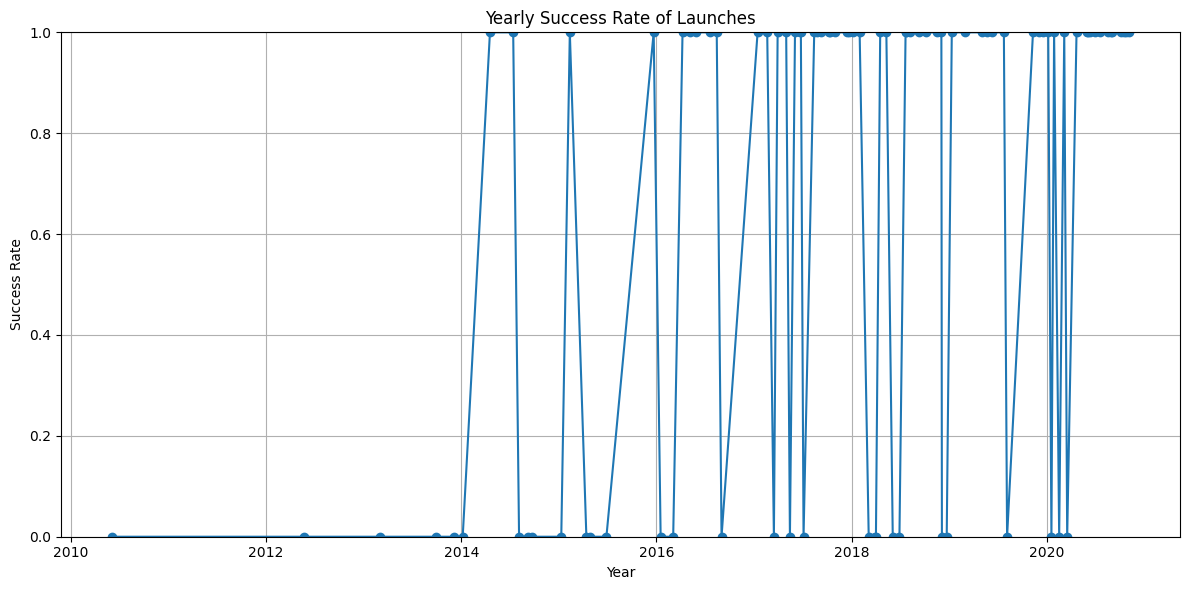

In [19]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
yearly_success_rate = df.groupby('Date')['Class'].apply(lambda x: (x == 1).mean())

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(yearly_success_rate.index, yearly_success_rate.values, marker='o', linestyle='-')

# Customize the plot
plt.title('Yearly Success Rate of Launches')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.ylim(0, 1)  # Set the y-axis limits between 0 and 1

# Show the plot
plt.grid()
plt.tight_layout()
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020


In [20]:
## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [21]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [22]:
#Create dummy variables to categorical columns
# Specify the columns to be one-hot encoded
columns_to_encode = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# Use get_dummies to create dummy variables
features_one_hot = pd.get_dummies(features, columns=columns_to_encode)

# Display the results
print(features_one_hot.head())

   FlightNumber  PayloadMass  Flights  GridFins  Reused   Legs  Block  \
0             1  6104.959412        1     False   False  False    1.0   
1             2   525.000000        1     False   False  False    1.0   
2             3   677.000000        1     False   False  False    1.0   
3             4   500.000000        1     False   False  False    1.0   
4             5  3170.000000        1     False   False  False    1.0   

   ReusedCount  Orbit_ES-L1  Orbit_GEO  ...  Serial_B1048  Serial_B1049  \
0            0            0          0  ...             0             0   
1            0            0          0  ...             0             0   
2            0            0          0  ...             0             0   
3            0            0          0  ...             0             0   
4            0            0          0  ...             0             0   

   Serial_B1050  Serial_B1051  Serial_B1054  Serial_B1056  Serial_B1058  \
0             0             0      